In [1]:
#MOVIE LENS PROJECT ANALYSIS
#import of datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

movie_data = pd.read_csv(r"D:\mani\mani\AI_ML\project\main\Data-Science-with-Python-Project-One-master\Data_science_with_Python_1\movies.dat", 
                         sep="::", header=None, names=['MovieID','Title','Genres'],engine='python')

users_data = pd.read_csv(r"D:\mani\mani\AI_ML\project\main\Data-Science-with-Python-Project-One-master\Data_science_with_Python_1\users.dat", 
                         sep="::", header=None, names=['UserID','Gender','Age','Occupation','Zip-code'], engine='python')

ratings_data = pd.read_csv(r"D:\mani\mani\AI_ML\project\main\Data-Science-with-Python-Project-One-master\Data_science_with_Python_1\ratings.dat",
                           sep="::", header=None, names=['UserID','MovieID','Rating','Timestamp'], engine='python')


In [2]:
#Merging of Table
Md1= pd.merge(ratings_data,users_data,on='UserID')
Master_Data= pd.merge(Md1,movie_data,on='MovieID')

In [3]:
print(Master_Data)

         UserID  MovieID  Rating  Timestamp Gender  Age  Occupation Zip-code  \
0             1     1193       5  978300760      F    1          10    48067   
1             2     1193       5  978298413      M   56          16    70072   
2            12     1193       4  978220179      M   25          12    32793   
3            15     1193       4  978199279      M   25           7    22903   
4            17     1193       5  978158471      M   50           1    95350   
...         ...      ...     ...        ...    ...  ...         ...      ...   
1000204    5949     2198       5  958846401      M   18          17    47901   
1000205    5675     2703       3  976029116      M   35          14    30030   
1000206    5780     2845       1  958153068      M   18          17    92886   
1000207    5851     3607       5  957756608      F   18          20    55410   
1000208    5938     2909       4  957273353      M   25           1    35401   

                                       

In [4]:
#Extracting the columns as per requirement
Master_Data=Master_Data[["MovieID", "Title", "UserID", "Age", "Gender", "Occupation", "Rating"]]

In [5]:
print(Master_Data)

         MovieID                                        Title  UserID  Age  \
0           1193       One Flew Over the Cuckoo's Nest (1975)       1    1   
1           1193       One Flew Over the Cuckoo's Nest (1975)       2   56   
2           1193       One Flew Over the Cuckoo's Nest (1975)      12   25   
3           1193       One Flew Over the Cuckoo's Nest (1975)      15   25   
4           1193       One Flew Over the Cuckoo's Nest (1975)      17   50   
...          ...                                          ...     ...  ...   
1000204     2198                           Modulations (1998)    5949   18   
1000205     2703                        Broken Vessels (1998)    5675   35   
1000206     2845                            White Boys (1999)    5780   18   
1000207     3607                     One Little Indian (1973)    5851   18   
1000208     2909  Five Wives, Three Secretaries and Me (1998)    5938   25   

        Gender  Occupation  Rating  
0            F          10

In [6]:
#Data Visualisation
#User Age Distribution
age_group = users_data.groupby('Age').size()
print(age_group)

Age
1      222
18    1103
25    2096
35    1193
45     550
50     496
56     380
dtype: int64


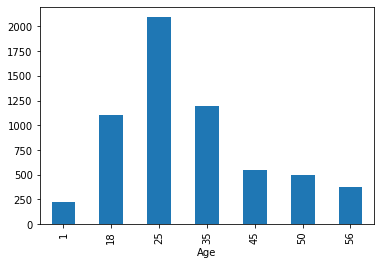

In [7]:
age_group.plot.bar()

In [8]:
#User rating of the movie Toy story

toystory_data = ratings_data[ratings_data.MovieID==1]

In [9]:
toystory_group = toystory_data.groupby('Rating').size()
print(toystory_group)

Rating
1     16
2     61
3    345
4    835
5    820
dtype: int64


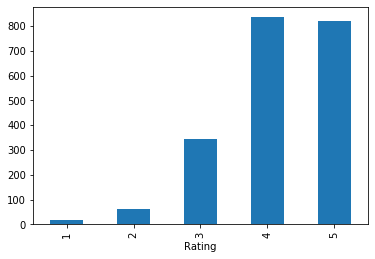

In [10]:
toystory_group.plot.bar()

In [11]:
#Top 25 movies by viewership rating
movie_rating = ratings_data.groupby(['MovieID'], as_index=False)
average_movie_ratings = movie_rating.agg({'Rating':'mean'})
top_25_movies = average_movie_ratings.sort_values('Rating', ascending=False).head(25)
top_25_movies

,MovieID,Rating
926,989,5.000000
3635,3881,5.000000
1652,1830,5.000000
3152,3382,5.000000
744,787,5.000000
3054,3280,5.000000
3367,3607,5.000000
3010,3233,5.000000
2955,3172,5.000000
3414,3656,5.000000


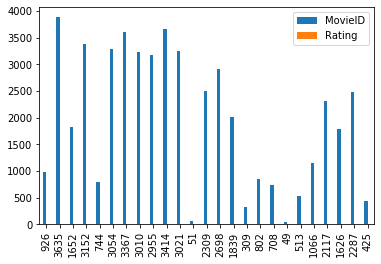

In [12]:
top_25_movies.plot.bar()

In [13]:
pd.merge(top_25_movies, movie_data, how='left', left_on=['MovieID'], right_on=['MovieID'])

,MovieID,Rating,Title,Genres
0,989,5.000000,Schlafes Bruder (Brother of Sleep) (1995),Drama
1,3881,5.000000,Bittersweet Motel (2000),Documentary
2,1830,5.000000,Follow the Bitch (1998),Comedy
3,3382,5.000000,Song of Freedom (1936),Drama
4,787,5.000000,"Gate of Heavenly Peace, The (1995)",Documentary
5,3280,5.000000,"Baby, The (1973)",Horror
6,3607,5.000000,One Little Indian (1973),Comedy|Drama|Western
7,3233,5.000000,Smashing Time (1967),Comedy
8,3172,5.000000,Ulysses (Ulisse) (1954),Adventure
9,3656,5.000000,Lured (1947),Crime


In [14]:
#ratings for all the movies reviewed by for a particular user of user id = 2696
user_rating = ratings_data[ratings_data['UserID']==2696]

In [15]:
print(user_rating)

        UserID  MovieID  Rating  Timestamp
440667    2696     1258       4  973308710
440668    2696     1270       2  973308676
440669    2696     1617       4  973308842
440670    2696     1625       4  973308842
440671    2696     1644       2  973308920
440672    2696     1645       4  973308904
440673    2696     1805       4  973308886
440674    2696     1892       4  973308904
440675    2696      800       5  973308842
440676    2696     2338       2  973308920
440677    2696     1711       4  973308904
440678    2696     3176       4  973308865
440679    2696     2389       4  973308710
440680    2696     1589       3  973308865
440681    2696     2713       1  973308710
440682    2696     3386       1  973308842
440683    2696     1783       4  973308865
440684    2696      350       3  973308886
440685    2696     1092       4  973308886
440686    2696     1097       3  973308690


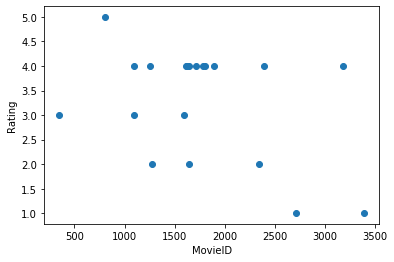

In [16]:
plt.scatter(user_rating['MovieID'], user_rating['Rating'])
plt.xlabel("MovieID") 
plt.ylabel("Rating") 
plt.show() 

In [17]:
#Find out all the unique genres 
#(Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)

Md1= pd.merge(movie_data,ratings_data,on='MovieID')
Md2= pd.merge(Md1,users_data,on='UserID')
display (Md2.head())
Md2.Genres.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


0             Animation|Children's|Comedy
1    Animation|Children's|Musical|Romance
2                                   Drama
3         Action|Adventure|Fantasy|Sci-Fi
4                               Drama|War
Name: Genres, dtype: object

In [18]:
Md2.Genres = Md2.Genres.str.split("|")

In [19]:
Md2.shape

(1000209, 10)

In [20]:
#Fetch 7000 values
data_5000=Md2[:5000]
list1=[]
for i in range(len(data_5000)):
    list1=list1+(data_5000.Genres[i])

In [21]:
unique_genres=list(set(list1))
print(unique_genres)
print(len(unique_genres))

['War', 'Film-Noir', 'Crime', 'Documentary', 'Sci-Fi', "Children's", 'Comedy', 'Animation', 'Musical', 'Romance', 'Action', 'Thriller', 'Adventure', 'Western', 'Mystery', 'Horror', 'Drama', 'Fantasy']
18


In [22]:
unique_genres=pd.Series(unique_genres)
unique_genres

0             War
1       Film-Noir
2           Crime
3     Documentary
4          Sci-Fi
5      Children's
6          Comedy
7       Animation
8         Musical
9         Romance
10         Action
11       Thriller
12      Adventure
13        Western
14        Mystery
15         Horror
16          Drama
17        Fantasy
dtype: object

In [23]:
#Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre
df=pd.DataFrame()
for row in data_5000.Genres:
    a=unique_genres.isin(row)
    df=df.append(a,ignore_index=True)
df[:10]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [24]:
#Determine the features affecting the ratings of any particular movie
import seaborn as sns        #better visualisation purpose
plt.figure(figsize=(10,10))
corr=data_5000.corr()

<Figure size 720x720 with 0 Axes>

In [25]:
print(corr)

             MovieID    UserID    Rating  Timestamp       Age  Occupation
MovieID     1.000000 -0.009686 -0.023939   0.048158 -0.002963    0.003326
UserID     -0.009686  1.000000 -0.035938   0.083489  0.030232    0.089497
Rating     -0.023939 -0.035938  1.000000   0.039092 -0.043913   -0.038687
Timestamp   0.048158  0.083489  0.039092   1.000000  0.114029    0.100359
Age        -0.002963  0.030232 -0.043913   0.114029  1.000000    0.071364
Occupation  0.003326  0.089497 -0.038687   0.100359  0.071364    1.000000


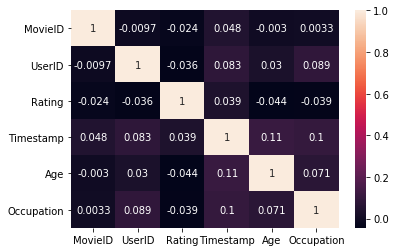

In [26]:
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True)

In [27]:
#Develop an appropriate model to predict the movie ratings
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [28]:
# create a Python list of feature names
feature_cols = ['Age', 'Occupation']

Md1= pd.merge(ratings_data,users_data,on='UserID')
Md1=Md1.head(500)
# use the list to select a subset of the original DataFrame
X = Md1[feature_cols]

# select a Series from the DataFrame
y = Md1.Rating

# split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((375, 2), (125, 2), (375,), (125,))

In [30]:
#Logistic regression
logitReg = LogisticRegression()
lm = logitReg.fit(X_train.head(), y_train.head())

In [31]:
result = logitReg.predict(X_test)

In [32]:
# Test options and evaluation metric
print (accuracy_score(y_test, result))

0.28


In [33]:
# Spot-Check Algorithms
seed = 7
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=None)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\ESWARI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ESWARI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

LR: 0.338691 (0.044638)
LDA: 0.330725 (0.052238)
KNN: 0.285775 (0.079002)
CART: 0.349431 (0.057077)
NB: 0.293528 (0.042232)
SVM: 0.354410 (0.057905)


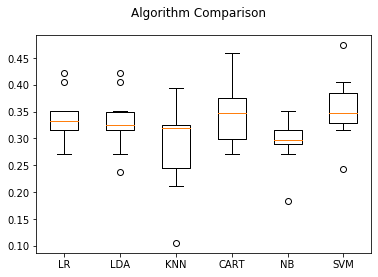

In [34]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()